# ANALIZA PODATKOV
Podatke najprej uvozimo iz primerne datoteke in si nato ogledamo "prejeto" tabelo.
Pomen podatkov lahko v večini bralec prek naslova posamezne naslovne vrstice razbere sam, vredno je le omeniti, da fg_pct predstavlja povprečje vseh metov iz igre, stolpci fg3_pct, fg2_pct, ft_pct pa po isti logiki predstavljajo povprečje metov za 3 ali 2 točki oziroma povprečje prostih metov (gre le za način zapisa, ki je v svetu košarke zelo popularen).

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
igralci = pd.read_csv('players.csv')
igralci

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
0,Tom Abernethy,PF,0.42,0.00,0.42,0.63,1.57,0.62,2.35
1,Alvan Adams,C,0.50,0.09,0.50,0.81,6.22,3.86,12.53
2,Dennis Awtrey,C,0.42,0.00,0.42,0.63,2.70,1.13,2.33
3,Gus Bailey,SG,0.46,1.00,0.44,0.39,1.40,1.30,1.90
4,James Bailey,PF,0.48,0.04,0.48,0.70,4.78,0.80,8.56
...,...,...,...,...,...,...,...,...,...
3119,Coby White,PG,0.39,0.35,0.43,0.79,3.50,2.70,13.20
3120,Grant Williams,PF,0.41,0.25,0.55,0.72,2.60,1.00,3.40
3121,Nigel Williams-Goss,PG,0.31,0.29,0.33,1.00,0.60,0.60,1.40
3122,Zion Williamson,PF,0.58,0.43,0.59,0.64,6.30,2.10,22.50


Razvrstimo sedaj igralce po njihovem povprečju točk na tekmo in poglejmo ali prepoznamo katerega izmed aktivnih igralcev lige NBA. Opazimo, da so čisto pri vrhu nekateri znani še aktivni igralci (LeBron James, Kevin Durant, James Harden), malo nižje pa se skriva tudi Luka Dončić.

In [2]:
igralci_tocke = igralci.sort_values('points_per_game', ascending=False)
igralci_tocke[["name surname", "position", "points_per_game"]]

,name surname,position,points_per_game
1785,LeBron James,SG,27.05
2066,Kevin Durant,SG,26.88
2204,James Harden,SG,25.14
2936,Luka Dončić,SG,25.00
2422,Damian Lillard,PG,24.44
...,...,...,...
1593,Andy Panko,SF,0.00
581,Ron Crevier,C,0.00
2699,Ben Bentil,PF,0.00
1516,Derek Hood,PF,0.00


Sedaj je smiselno igralce pogrupirati po njihovi poziciji, saj bo velik del naše raziskave/naših hipotez posvečen raziskavi povezav med pozicijo igralca in njegovo statistiko.
To bo treba narediti ročno, saj pozicija igralca ni popolnoma fiksna (nekateri igralci (takih je sicer malo, kar je vidno iz spodnjega prikaza po številu) lahko večino časa preživijo na eni izmed pozicij, a občasno igra na drugi, sicer po vlogi podobni poziciji - tako da je korelacijo še vedno smiselno raziskovati, a je naveden v v obliki POZICIJA1-POZICIJA2). Pozicija 1 je tista, na kateri igralce preživi več časa, zato je le-to bolj smiselno vzeti kot njegovo standardno pozicijo.

In [3]:
position_group = igralci.groupby("position")
position_group.size()

position
C        555
C-PF       3
PF       640
PF-C       4
PF-SF      6
        ... 
SF-PF      4
SF-SG      3
SG       689
SG-PG      5
SG-SF      3
Length: 13, dtype: int64

In [4]:
cisti_centri = position_group.get_group("C")
prehodni_centri = position_group.get_group("C-PF")

In [5]:
centri = pd.concat([prehodni_centri, cisti_centri])
centri.head(5)

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
418,Scott Hastings,C-PF,0.41,0.24,0.43,0.78,1.93,0.39,2.35
1880,Jackson Vroman,C-PF,0.40,0.00,0.40,0.58,2.92,0.70,3.35
3045,Donta Hall,C-PF,0.57,0.00,0.57,0.53,4.20,0.43,4.13
1,Alvan Adams,C,0.50,0.09,0.50,0.81,6.22,3.86,12.53
2,Dennis Awtrey,C,0.42,0.00,0.42,0.63,2.70,1.13,2.33


In [6]:
cisti_pf = position_group.get_group("PF")
prehodni_pf_1 = position_group.get_group("PF-C")
prehodni_pf_2 = position_group.get_group("PF-SF")

In [7]:
pf = pd.concat([cisti_pf, prehodni_pf_1, prehodni_pf_2])
pf.head(5)

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
0,Tom Abernethy,PF,0.42,0.00,0.42,0.63,1.57,0.62,2.35
4,James Bailey,PF,0.48,0.04,0.48,0.70,4.78,0.80,8.56
7,Marvin Barnes,PF,0.40,0.00,0.40,0.50,3.90,0.90,3.20
8,Tim Bassett,PF,0.35,0.00,0.35,0.67,2.80,1.27,2.73
10,Ron Behagen,PF,0.39,0.00,0.39,0.83,2.30,1.20,3.80


In [8]:
cisti_sf = position_group.get_group("SF")
prehodni_sf_1 = position_group.get_group("SF-PF")
prehodni_sf_2 = position_group.get_group("SF-SG")

In [9]:
sf = pd.concat([cisti_sf, prehodni_sf_1, prehodni_sf_2])
sf.head(5)

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
5,Greg Ballard,SF,0.43,0.29,0.44,0.82,6.12,2.14,12.71
6,Mike Bantom,SF,0.48,0.27,0.48,0.65,5.54,2.20,11.30
19,Alonzo Bradley,SF,0.35,1.00,0.34,0.67,0.30,0.10,1.90
24,Junior Bridgeman,SF,0.47,0.24,0.48,0.85,3.08,2.49,13.03
25,Allan Bristow,SF,0.45,0.30,0.46,0.80,4.28,4.08,7.52


In [10]:
cisti_sg = position_group.get_group("SG")
prehodni_sg_1 = position_group.get_group("SG-SF")
prehodni_sg_2 = position_group.get_group("SG-PG")

In [11]:
sg = pd.concat([cisti_sg, prehodni_sg_1, prehodni_sg_2])
sg.head(5)

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
3,Gus Bailey,SG,0.46,1.00,0.44,0.39,1.40,1.30,1.90
9,Billy Ray Bates,SG,0.39,0.30,0.40,0.64,1.28,1.25,8.65
14,Otis Birdsong,SG,0.50,0.24,0.50,0.55,2.48,3.09,15.28
15,Ron Boone,SG,0.42,0.26,0.42,0.86,2.27,3.02,9.70
18,Winford Boynes,SG,0.43,0.00,0.43,0.79,1.90,1.15,7.50


In [12]:
cisti_pg = position_group.get_group("PG")
prehodni_pg = position_group.get_group("PG-SG")

In [13]:
pg = pd.concat([cisti_pg, prehodni_pg])
pg.head(5)

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
12,Del Beshore,PG,0.35,0.39,0.35,0.67,0.90,2.00,3.60
13,Henry Bibby,PG,0.39,0.27,0.41,0.74,1.75,3.20,6.80
21,Mike Bratz,PG,0.39,0.26,0.41,0.82,1.60,3.11,6.11
30,Quinn Buckner,PG,0.45,0.12,0.46,0.68,2.56,3.76,7.86
32,Don Buse,PG,0.42,0.31,0.45,0.78,1.78,3.55,5.93


## HIPOTEZA 1
>_"Vsaka pozicija je v ligi številčno enakomerno zastopana (igralcev posamezne pozicije je okvirno enako)."_

Sedaj imamo podatke smiselno pogrupirane, zato lahko pogledamo, kako je po procentih vsaka izmed pozicij zastopana. Po hipotezi 1 pričakujemo enakomerno razporeditev (okviren 20%-20%-20%-20%-20%). 
Ko "narišemo" tortni diagram, opazimo da je temu res tako. Nekoliko je "na račun" igralcev pozicije center več le igralcev pozicije SG, a je graf vseeno dokaj enakomerno razporejen, zato lahko potrdimo hipotezo 1.
(Le to je tudi smiselno, če poznamo dejstvo, da imamo 5 pozicij, v igri pa je naenkrat po 1 igralec vsake pozicije)

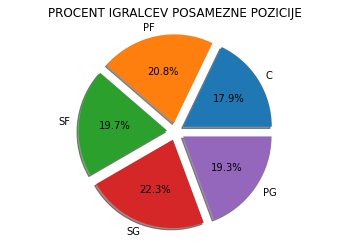

In [14]:
import matplotlib.pyplot as plt
all_players = len(pg) + len(sg) + len(sf) + len(pf) + len(centri)
labels = 'C', 'PF', 'SF', 'SG', 'PG'
sizes = [
        len(centri) / all_players, 
        len(pf) / all_players,
        len(sf) / all_players,
        len(sg) / all_players,
        len(pg) / all_players,
        ]
fig1, ax1 = plt.subplots()
ax1.pie(
        sizes, 
        explode= (0.1, 0.1, 0.1, 0.1, 0.1), 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=0
        )
ax1.axis('equal')
plt.title('PROCENT IGRALCEV POSAMEZNE POZICIJE')
plt.show()

### POSTOPEK PREVERJANJA HIPOTEZ 2, 3, 4 in 5

Hipoteze 2, 3, 4, 5 so postavljene glede na povprečje pozicije igralca (tu imena ne bodo pomebna, statistika igralca pa le za izračun povprečja). Zato je smiselno poračunati povprečje po že ločenih pozicijah, ter nato definirati novo tabelo, v kateri bodo dostopni le za te hipoteze pomembni podatki (predstavitev bo potekala po pozicijah).

In [15]:
pg_mean = pg[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
sg_mean = sg[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
sf_mean = sf[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
pf_mean = pf[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
centri_mean = centri[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()


In [16]:
data = {
	'fg_pct': [
		"{:.2%}".format(round(pg_mean.fg_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg_pct, 4))
	],
	'fg3_pct': [
		"{:.2%}".format(round(pg_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg3_pct, 4))
	],
	'fg2_pct': [
		"{:.2%}".format(round(pg_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg2_pct, 4))
	],
	'ft_pct': [
		"{:.2%}".format(round(pg_mean.ft_pct, 4)), 
		"{:.2%}".format(round(sg_mean.ft_pct, 4)), 
		"{:.2%}".format(round(sf_mean.ft_pct, 4)), 
		"{:.2%}".format(round(pf_mean.ft_pct, 4)), 
		"{:.2%}".format(round(centri_mean.ft_pct, 4))
	],
	'rebounds': [
		round(pg_mean.rebounds, 2), 
		round(sg_mean.rebounds, 2), 
		round(sf_mean.rebounds, 2), 
		round(pf_mean.rebounds, 2), 
		round(centri_mean.rebounds, 2)
	],
	'asists': [
		round(pg_mean.asists, 2), 
		round(sg_mean.asists, 2),  
		round(sf_mean.asists, 2),  
		round(pf_mean.asists, 2),  
		round(centri_mean.asists, 2)
	],
	'points_per_game': [
		round(pg_mean.points_per_game, 2), 
		round(sg_mean.points_per_game, 2), 
		round(sf_mean.points_per_game, 2), 
		round(pf_mean.points_per_game, 2), 
		round(centri_mean.points_per_game, 2)
	]
}
table_position = pd.DataFrame(data, index = ['PG', 'SG', 'SF', 'PF', 'C'])
table_position


,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
PG,39.39%,25.78%,42.22%,69.12%,1.66,2.70,6.24
SG,38.84%,24.76%,42.09%,65.85%,1.80,1.41,5.97
SF,41.00%,21.37%,43.66%,64.18%,2.57,1.05,6.02
PF,43.49%,13.60%,45.41%,60.93%,3.49,0.76,5.54
C,44.77%,7.04%,45.54%,56.92%,3.46,0.64,4.63


## HIPOTEZA 2
>_"Igralci pozicij G (guards) dosežejo povprečno več točk na tekmo kot igralci pozicij F (forwards) in igralci pozicije C (center)."_

Želimo preveriti ali obstaja korelacija med pozicijo in številom točk, ki jih povprečno igralec tiste pozicije doseže. V hipotezi trdimo, da največ točk dosežejo igralci pozicije guard (G).<br>
Na podlagi spodnjega grafa opazimo, da v igralci pozicije guard (PG  in SG) v povprečejo res dosežejo več točk kot igralci pozicije forward (SF in PF) in tudi pozicije center (C), zato hipotezo potrdimo, a so rezultati presenetljivo blizu. Igralci pozicije SF (pripadajo skupini forward) celo povprečno dosežejo nekoliko več točk kot igralci skupine SG (pripadajo skupini guard).

<AxesSubplot:title={'center':'POVPREČEN IZKUPIČEK TOČK PO POZICIJAH'}>

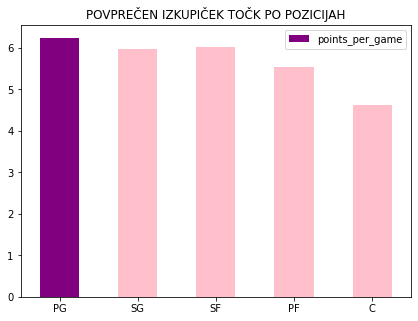

In [17]:
color = [
    "purple" if graph == max(table_position['points_per_game'])
    else "pink" 
    for graph in table_position['points_per_game']
    ]
table_position.plot.bar(
    y='points_per_game', 
    rot=0, 
    color = color,
    figsize = (7,5),
    title = "POVPREČEN IZKUPIČEK TOČK PO POZICIJAH"
)

## HIPOTEZA 3
>_"Igralci pozicij G (guards) dosežejo povprečno več asistenc na tekmo kot igralci pozicij F (forwards) in igralci pozicije C (center) skupaj."_

Pogledati želimo ali prevladujočo količino asistenc res zabeležijo igralci pozicije PG in SG, kot to trdimo v hipotezi. Zbrane podatke predstavimo z tortnim diagramom (spodaj) in opazimo, da prevladujoč delež asistenc zabeležijo igralci pozicije PG (organizatorji igre) - kar 2/5, sledijo jim igralci pozicije SG s 1/5. Tako z zagotovostjo lahko potrdimo našo hipotezo.

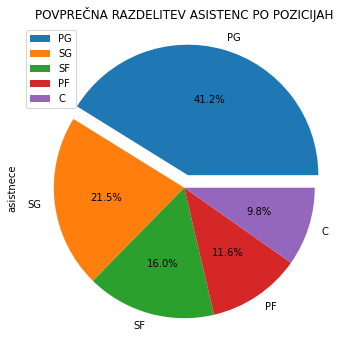

In [18]:
table_position.plot(
    kind = 'pie', 
    y = 'asists', 
    ylabel='asistnece',
    title = "POVPREČNA RAZDELITEV ASISTENC PO POZICIJAH", 
    figsize = (6,6), 
    autopct='%1.1f%%',
    explode = (0.1, 0, 0, 0, 0)
    )
plt.show()

## HIPOTEZA 4
>_"Igralci pozicije C (center) in igralci pozicije PF, dosežejo povprečno več skokov, kot igralci pozicij SF in G (guards) skupaj. Igralci C zabeležijo največ skokov."_

Preveriti želimo ali res igralci pozicije center (C) zabeležijo največ skokov, ter analizirita kako se njihov procent primerja z ostalimi. Hipoteza pravi tudi, da igralci pozicije center (C) skupaj z igralci pozicije PF zabeležijo več kot polovico vseh skokov, zato bo za analizo spet najbolj primeren tortni diagram (spodaj).<br>
Opazimo, da smo prvi del hipoteze narobe zastavili, zato ga ovržemo. Več skokov namreč zabeležijo igralci pozicije PF (vendar le za 0,2% več). Kljub temu pa lahko potrdimo drugi del hipoteze, saj omenjeni poziciji skupaj zabeležita več kot 50% vseh skokov. Preostali skoki so skoraj enakomerno razporejeni med ostale tri pozicije (PG, SG, SF), nekaj več procentov skokov le še "poberejo" igralci pozicije SF.

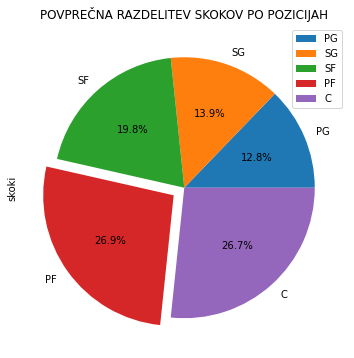

In [19]:
table_position.plot(
    kind = 'pie', 
    y = 'rebounds', 
    ylabel = 'skoki',
    title = "POVPREČNA RAZDELITEV SKOKOV PO POZICIJAH", 
    figsize = (6,6), 
    autopct='%1.1f%%',
    explode = (0, 0, 0, 0.1, 0)
    )
plt.show()

### HIPOTEZE 2, 3 IN 4 
Zgoraj zapisane opazke/komentarji glede hipotez so tudi dobro razvidne iz spodnjega grafa, na katerem opazimo predvsem sunkovit padec števila asistenc in rast števila skokov, ko se pomikamo od leve proti desni (od PG do C). Tudi padec povprečnega števila točk je lepo razviden, a je le-ta malo bolj položen. 

<AxesSubplot:title={'center':'ŠTEVILO TOČK, ASISTENC IN SKOKOV PO POZICIJAH'}>

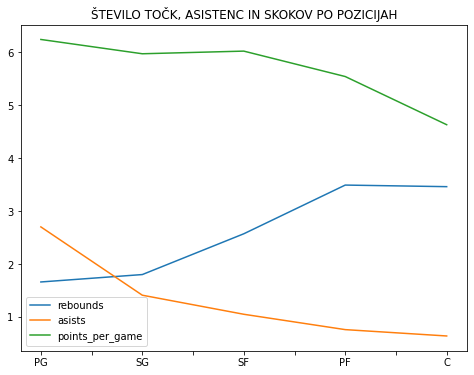

In [20]:
table_position[['rebounds','asists','points_per_game']].plot(
    title = "ŠTEVILO TOČK, ASISTENC IN SKOKOV PO POZICIJAH", 
    figsize = (8, 6) 
    )

## HIPOTEZA 5
>_"Igralci pozicij G (guards) imajo največji odstotek meta (tako iz igre kot tudi prostih metov), sledijo jih igralci pozicij F (forwards) in nato igralci pozicije C (center)."_

Preverimo kakšna je korelacija (če sploh kakšna), med izkupičkom meta iz igre (ter tudi izkupičkom prostih metov), ter pozicijo igralca. Grafa spodaj nazorno prikažeta, da smo prvi del hipoteze popolnoma narobe zastavili in je korelacija v resnici ravno obratna - igralci pozicije C imajo večji izkupiček meta iz igre, najslabšega pa igralci pozicije guard (PG). Kljub temu pa lahko potrdimo drugi del naše hipoteze, saj opazimo, da izkupiček prostih metov skoraj linearno pada po pozicijah (od PG pa vse do C).

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

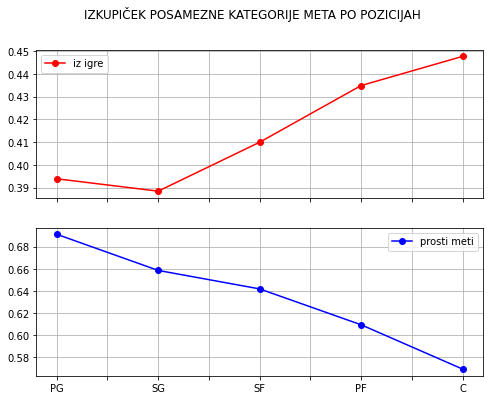

In [21]:
data = {
	'iz igre': [
		pg_mean.fg_pct, 
		sg_mean.fg_pct, 
		sf_mean.fg_pct, 
		pf_mean.fg_pct, 
		centri_mean.fg_pct
		],
	'prosti meti': [
		pg_mean.ft_pct, 
		sg_mean.ft_pct, 
		sf_mean.ft_pct,
		pf_mean.ft_pct, 
		centri_mean.ft_pct
		]
	}
data_frame = pd.DataFrame(data, index = ['PG','SG','SF','PF','C'])
data_frame.plot(
		kind='line', 
		subplots=True, 
		grid=True, 
		title="IZKUPIČEK POSAMEZNE KATEGORIJE META PO POZICIJAH",
        legend=True, 
		figsize = (8,6),  
        style=['r','b'],
		marker='o'
        )

## HIPOTEZA 6
>_"Igralec z boljših odstotkom meta za 3 ima tudi boljši odstotek meta za 2 (obstaja korelacija med odstotkom meta za 2 in odstotkom meta za 3). Prav tako ima igralec z boljših odstotkom meta za 3 boljši odstotek zadetih prostih metov."_

Poglejmo ali obstaja korelacija med izkupičkom meta za 3 točke in metom za 2 točki oziroma prostimi meti.
Spodnja "scatter" grafa nam pokažeta, da sicer prihaja do nekakšnega zgostitvenega območja, tako pri prvem grafu (kjer gledamo korelacijo z metom za 2 točki), kot tudi na drugem grafu (kjer gledamo korelacijo s prostimi meti), vendar so podatki vseeno preveč razpršeni, da bi lahko potrdili direktno korelacijo in s tem našo hipotezo. Zato jo ovržemo. Opazimo predvsem 3 področja neujemanja, kjer zaznamo (tako na prvem kot tudi drugem grafu) pri fiksni vrednosti meta za 3 točke, skoraj celoten spekter izkupička meta za 2 točki na prvem in izkupičku prostih metov na drugem grafu. Ta območja so pri zelo nizkem, ter zelo visokem izkupičku meta za 3 točke (blizu 0.0 in 1.0), ter med njima še bolj presenetljivo okoli vrednosti 0.4 izkupička meta za 3 točke.

<AxesSubplot:title={'center':'POVEZAVA MED IZKUPIČKOM META ZA 3 TOČKE IN PROSTIMI METI'}, xlabel='met za 3 točke', ylabel='prosti meti'>

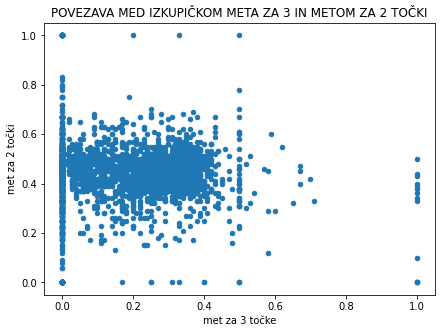

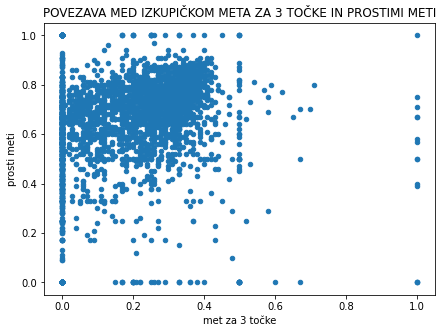

In [22]:
igralci.plot(
    kind = 'scatter', 
    x='fg3_pct', 
    y='fg2_pct', 
    xlabel = 'met za 3 točke',
    ylabel= 'met za 2 točki',
    figsize =(7,5), 
    title = 'POVEZAVA MED IZKUPIČKOM META ZA 3 IN METOM ZA 2 TOČKI'
    )
igralci.plot(
    kind = 'scatter', 
    x='fg3_pct',
    y='ft_pct',
    xlabel = 'met za 3 točke',
    ylabel='prosti meti',
    figsize =(7,5),
    title = 'POVEZAVA MED IZKUPIČKOM META ZA 3 TOČKE IN PROSTIMI METI'
    )

## HIPOTEZA 7
>_"Igralci z večjim povprečjem doseženimi točkam imajo tudi boljših odstotkom meta iz igre."_

Vrnimo se spet na "osnovno" tabelo. Preverimo ali res obstaja povezava med številom doseženim točk in procentom/izkupičkom meta. Ko narišemo spodnji "scatter" graf opazimo, da sicer se vrednost izkupička meta nekoliko stabilizira, ko se premaknemo k večjemu povprečju, a vseeno ne gre za odvisnost, ki smo jo predvideli v hipotezi, zato jo ovržemo. Opazimo, da je predvsem pri nižjem povprečju "spekter" izkupička kar velik (imamo zelo učinkovite igralce z niznim povprečjem in igralce s slabim povprečjem in slabim izkupičkom).

<AxesSubplot:title={'center':'IZKUPIČEK META IZ IGRE V ODVISNOSTI OD ŠTEVILA TOČK'}, xlabel='število točk na tekmo', ylabel='izkupiček meta'>

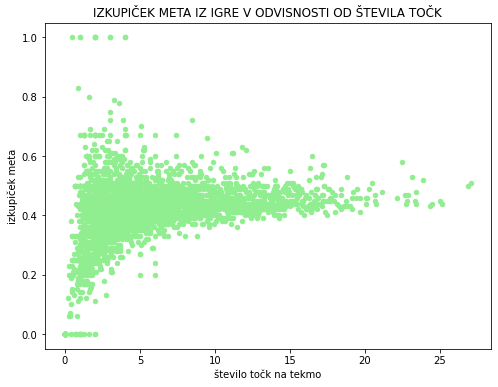

In [23]:
tocke = igralci.sort_values('points_per_game', ascending=False)
tocke.plot(
    kind = 'scatter', 
    x='points_per_game', 
    y='fg_pct', 
    color='LightGreen', 
    xlabel='število točk na tekmo', 
    ylabel='izkupiček meta',
    title='IZKUPIČEK META IZ IGRE V ODVISNOSTI OD ŠTEVILA TOČK',
    figsize = (8,6)
    )

## ZAKLJUČEK
Prek analize naših sedmih hipotez opazimo, da obstajajo povezave med igralci, ter njihovim povprečjem (asistenc, skokov, točk), vendar so te korelacije "lepše" vidne če igralce smiselno najprej pogrupiramo po pozicijah. Tako še dodatno raziščemo karakteristike vsake izmed pozicij, ter razlike med le-temi. Presenetljivo je, da ni velike korelacije med izkupičkom meta po posameznih kategorijah oziroma posamezni razdalji (2, 3 točke). Z nadaljno analizo bi bilo vredno raziskati zakaj je temu res tako.